In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, matthews_corrcoef, roc_auc_score, confusion_matrix, classification_report, accuracy_score
import tensorflow as tf

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
train_path = "penyakit_daun_kopi/train"
test_path = "penyakit_daun_kopi/test"
val_path = "penyakit_daun_kopi/val"

In [4]:
def load_dataset(path):
    images = []
    labels = []
    for folder in os.listdir(path):
        sub_path = os.path.join(path, folder)
        for img in os.listdir(sub_path):
            image_path = os.path.join(sub_path, img)
            img_arr = cv2.imread(image_path)
            img_arr = cv2.resize(img_arr, (224, 224))
            images.append(img_arr)
            labels.append(folder)
    return np.array(images), np.array(labels)

train_x, train_y = load_dataset(train_path)
test_x, test_y = load_dataset(test_path)
val_x, val_y = load_dataset(val_path)

In [5]:
train_x = train_x / 255.0
test_x = test_x / 255.0
val_x = val_x / 255.0

In [6]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [7]:
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x) # Add a fully connected layer
x = Dropout(0.5)(x) # Add dropout to prevent overfitting
prediction = Dense(len(np.unique(train_y)), activation='softmax')(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 23,236,163 (88.64 MB)

 Trainable params: 3,211,779 (12.25 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [9]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)
val_y = le.transform(val_y)

In [11]:
history = model.fit(
  train_x, train_y,
  validation_data=(val_x, val_y),
  epochs=10,
  batch_size=32,
  shuffle=True
)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.4824 - loss: 1.3618 - val_accuracy: 0.3946 - val_loss: 1.3951
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 358s 4s/step - accuracy: 0.6274 - loss: 0.7269 - val_accuracy: 0.3878 - val_loss: 1.9816
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.6870 - loss: 0.6189 - val_accuracy: 0.4490 - val_loss: 1.4694
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.6459 - loss: 0.6358 - val_accuracy: 0.4082 - val_loss: 1.6379
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 325s 4s/step - accuracy: 0.7056 - loss: 0.5801 - val_accuracy: 0.3878 - val_loss: 2.7152
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.7317 - loss: 0.5619 - val_accuracy: 0.4218 - val_loss: 2.0181
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 454s 5s/step - accuracy: 0.7157 - loss: 0.5385 - val_accuracy: 0.3878 - val_loss: 2.9266
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1140s 13s/step - accuracy: 0.7229 - loss: 0.5298 - val_accuracy: 0.3946 -

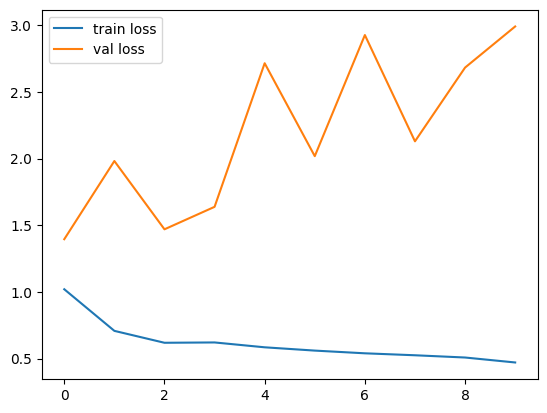

In [12]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-pdk.png')
plt.show()

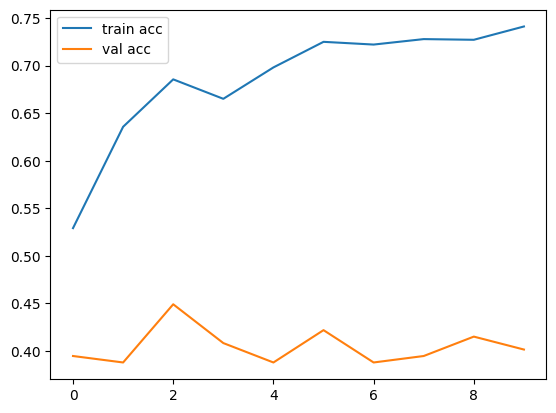

In [13]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('vgg-acc-pdk.png')
plt.show()

In [14]:
y_train_pred = np.argmax(model.predict(train_x), axis=1)
y_train_true = train_y  

88/88 ━━━━━━━━━━━━━━━━━━━━ 1141s 13s/step


In [15]:
train_loss, train_accuracy = model.evaluate(train_x, train_y, verbose=0)
print(f'Loss on training data: {train_loss}')
print(f'Accuracy on training data: {train_accuracy}')

Loss on training data: 0.3130556643009186
Accuracy on training data: 0.8984206914901733


In [16]:
cm = confusion_matrix(y_train_true, y_train_pred)

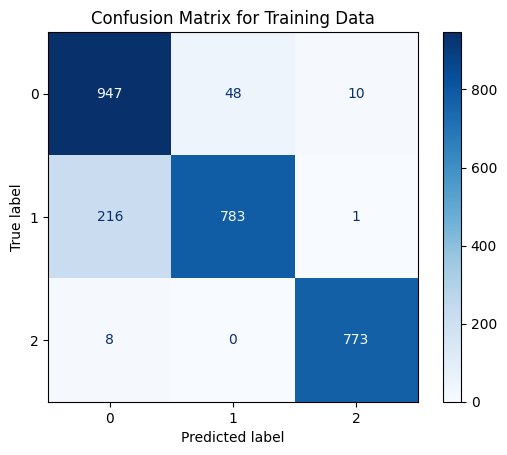

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Data')
plt.show()

In [18]:
model.evaluate(test_x, test_y, batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7222 - loss: 0.8455


[0.8454596996307373, 0.7222222089767456]

In [19]:
y_pred = model.predict(test_x)
y_pred_classes = np.argmax(y_pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [20]:
print(classification_report(test_y, y_pred_classes))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       1.00      0.50      0.67         6
           2       0.67      1.00      0.80         6

    accuracy                           0.72        18
   macro avg       0.78      0.72      0.71        18
weighted avg       0.78      0.72      0.71        18



In [21]:
conf_matrix = confusion_matrix(test_y, y_pred_classes)
print(conf_matrix)

[[4 0 2]
 [2 3 1]
 [0 0 6]]


In [22]:
f1 = f1_score(test_y, y_pred_classes, average='weighted')
accuracy = accuracy_score(test_y, y_pred_classes)
mcc = matthews_corrcoef(test_y, y_pred_classes)
auc = roc_auc_score(test_y, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")
print(f"MCC: {mcc}")
print(f"AUC: {auc}")

F1 Score: 0.7111111111111111
Accuracy: 0.7222222222222222
MCC: 0.6092717958449424
AUC: 0.9027777777777778


In [23]:
import seaborn as sns

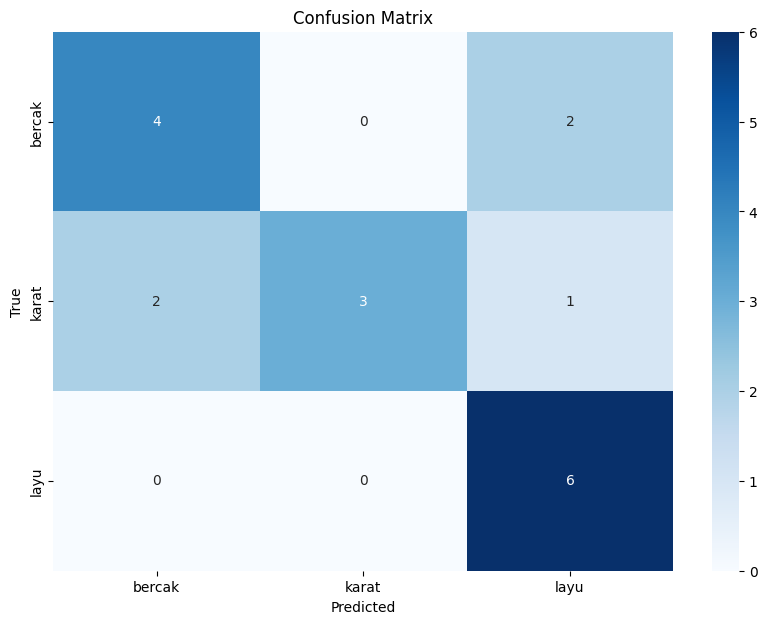

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.0].


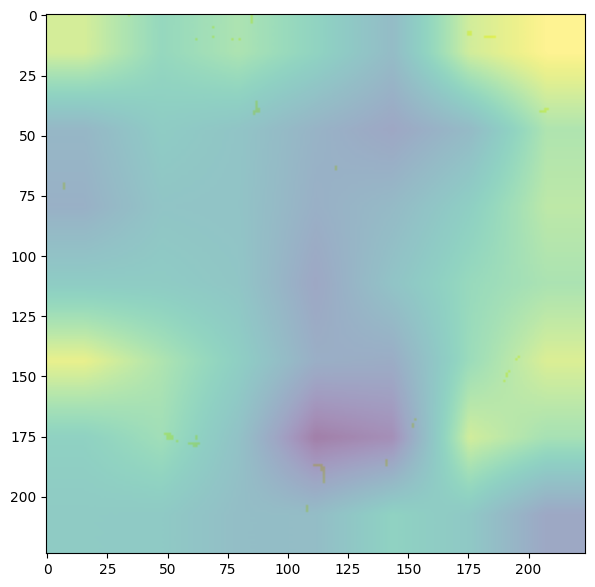

In [25]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            for layer in self.model.layers:
                if len(layer.output_shape) == 4:
                    self.layerName = layer.name
                    break
            else:
                raise ValueError("Could not find 4D layer, GradCAM cannot be applied")
  
    def get_gradcam_heatmap(self, img, eps=1e-8):
        img = np.expand_dims(img, axis=0)
        grad_model = tf.keras.models.Model(
            inputs=self.model.inputs,
            outputs=[self.model.get_layer(self.layerName).output, self.model.output]
        )
        with tf.GradientTape() as tape:
            conv_output, preds = grad_model(img)
            loss = preds[:, self.classIdx]
        grads = tape.gradient(loss, conv_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
        conv_output = conv_output[0]
        heatmap = conv_output @ pooled_grads[..., tf.newaxis]
        heatmap = tf.squeeze(heatmap).numpy()
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        return heatmap

def build_heatmap(model, img, predictedClass, layerName, classIdx=None, activation_of_truth=True):
    if activation_of_truth:
        Idx = classIdx if classIdx is not None else predictedClass
    else:
        Idx = predictedClass
    heatmapBuilder = GradCAM(model, Idx, layerName)
    heatmap = heatmapBuilder.get_gradcam_heatmap(img)
    heatmap = cv2.resize(heatmap, (224, 224))
    return heatmap

# Plot Grad-CAM
img_path = 'bercak kopi.jpeg'
img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
heatmap = build_heatmap(model, img_array, predictedClass=2, layerName='block5_pool')

plt.figure(figsize=(10, 7))
plt.imshow(img_array, alpha=0.5)
plt.imshow(heatmap, cmap='viridis', alpha=0.5)
plt.show()


In [26]:
# Misalkan 'model' adalah model yang telah dilatih
model.save('nama_model.h5')  # Menyimpan model ke file .h5
